## Youtube revenue prediction

### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


### Loading the dataset

In [3]:
df = pd.concat((pd.read_csv("Table data 2018.csv")[1:],pd.read_csv("Table data 2019.csv")[1:-1],pd.read_csv("Table data 2020.csv")[1:-1])).reset_index(drop=True)

In [4]:
df.head()

,Date,Av­er­age views per view­er,Unique view­ers,Im­pres­sions click-through rate (%),Im­pres­sions,Com­ments ad­ded,Shares,Likes (vs. dis­likes) (%),Dis­likes,Sub­scribers lost,Sub­scribers gained,Likes,Av­er­age per­cent­age viewed (%),Videos pub­lished,Videos ad­ded,Sub­scribers,Views,Watch time (hours),Av­er­age view dur­a­tion,Your es­tim­ated rev­en­ue (USD)
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,100.0,0.0,0.0,5.0,5.0,53.59,1.0,1.0,5.0,15.0,0.4666,0:01:51,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,100.0,0.0,2.0,6.0,4.0,44.58,NaN,NaN,4.0,37.0,0.9575,0:01:33,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,100.0,0.0,0.0,2.0,5.0,38.75,NaN,NaN,2.0,26.0,0.5849,0:01:20,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,24.81,NaN,NaN,0.0,8.0,0.1152,0:00:51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,45.50,NaN,NaN,1.0,17.0,0.4491,0:01:35,0.0


In [5]:
df.shape

(1133, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  1133 non-null   object 
 1   Av­er­age views per view­er           1133 non-null   float64
 2   Unique view­ers                       1133 non-null   float64
 3   Im­pres­sions click-through rate (%)  1133 non-null   float64
 4   Im­pres­sions                         1133 non-null   float64
 5   Com­ments ad­ded                      1133 non-null   float64
 6   Shares                                1133 non-null   float64
 7   Likes (vs. dis­likes) (%)             1096 non-null   float64
 8   Dis­likes                             1133 non-null   float64
 9   Sub­scribers lost                     1133 non-null   float64
 10  Sub­scribers gained                   1133 non-null   float64
 11  Likes            

In [7]:
df.columns

Index(['Date', 'Av­er­age views per view­er', 'Unique view­ers',
       'Im­pres­sions click-through rate (%)', 'Im­pres­sions',
       'Com­ments ad­ded', 'Shares', 'Likes (vs. dis­likes) (%)', 'Dis­likes',
       'Sub­scribers lost', 'Sub­scribers gained', 'Likes',
       'Av­er­age per­cent­age viewed (%)', 'Videos pub­lished',
       'Videos ad­ded', 'Sub­scribers', 'Views', 'Watch time (hours)',
       'Av­er­age view dur­a­tion', 'Your es­tim­ated rev­en­ue (USD)'],
      dtype='object')

In [8]:
df.dtypes

Date                                     object
Av­er­age views per view­er             float64
Unique view­ers                         float64
Im­pres­sions click-through rate (%)    float64
Im­pres­sions                           float64
Com­ments ad­ded                        float64
Shares                                  float64
Likes (vs. dis­likes) (%)               float64
Dis­likes                               float64
Sub­scribers lost                       float64
Sub­scribers gained                     float64
Likes                                   float64
Av­er­age per­cent­age viewed (%)       float64
Videos pub­lished                       float64
Videos ad­ded                           float64
Sub­scribers                            float64
Views                                   float64
Watch time (hours)                      float64
Av­er­age view dur­a­tion                object
Your es­tim­ated rev­en­ue (USD)        float64
dtype: object

In [9]:
df.isnull().sum()

Date                                      0
Av­er­age views per view­er               0
Unique view­ers                           0
Im­pres­sions click-through rate (%)      0
Im­pres­sions                             0
Com­ments ad­ded                          0
Shares                                    0
Likes (vs. dis­likes) (%)                37
Dis­likes                                 0
Sub­scribers lost                         0
Sub­scribers gained                       0
Likes                                     0
Av­er­age per­cent­age viewed (%)         0
Videos pub­lished                       142
Videos ad­ded                           142
Sub­scribers                              0
Views                                     0
Watch time (hours)                        0
Av­er­age view dur­a­tion                 0
Your es­tim­ated rev­en­ue (USD)          0
dtype: int64

In [10]:
col_map ={'Av­er­age views per view­er':'Average_views_per_viewer',
          'Unique view­ers':'Unique_viewers',
          'Av­er­age per­cent­age viewed (%)':'Average_viewed',
          'Im­pres­sions':'Impressions',
          'Dis\xadlikes':'Dislikes',
          'Sub­scribers lost':'Subscribers_lost',
          'Sub­scribers gained':'Subscribers_gained',
          'Videos pub­lished':'Videos_published',
          'Videos ad­ded':'Videos_added', 
          'Sub­scribers':'Subscribers',
          'Im­pres­sions click-through rate (%)':'Click_rate',
          'Com­ments ad­ded':'Comments',
          'Watch time (hours)':'Watch_hours',
          'Av­er­age view dur­a­tion':'Average_view_sec',
          'Your es­tim­ated rev­en­ue (USD)':'Revenue',
           'Likes (vs. dis­likes) (%)':'Likes_(vs_dislikes)'}

In [11]:
df=df.rename(columns=col_map)

In [12]:
df=df.drop(['Videos_added','Likes_(vs_dislikes)'],axis=1)

In [13]:
df.isnull().sum()

Date                          0
Average_views_per_viewer      0
Unique_viewers                0
Click_rate                    0
Impressions                   0
Comments                      0
Shares                        0
Dislikes                      0
Subscribers_lost              0
Subscribers_gained            0
Likes                         0
Average_viewed                0
Videos_published            142
Subscribers                   0
Views                         0
Watch_hours                   0
Average_view_sec              0
Revenue                       0
dtype: int64

In [14]:
df.select_dtypes(include=['object']).head(2)

,Date,Average_view_sec
0,2018-08-21,0:01:51
1,2018-08-22,0:01:33


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['Average_view_sec'] = pd.to_timedelta(df['Average_view_sec']).dt.seconds

In [16]:
df.head()

,Date,Average_views_per_viewer,Unique_viewers,Click_rate,Impressions,Comments,Shares,Dislikes,Subscribers_lost,Subscribers_gained,Likes,Average_viewed,Videos_published,Subscribers,Views,Watch_hours,Average_view_sec,Revenue
0,2018-08-21,1.1538,13.0,7.38,122.0,2.0,1.0,0.0,0.0,5.0,5.0,53.59,1.0,5.0,15.0,0.4666,111,0.0
1,2018-08-22,1.1935,31.0,23.14,121.0,3.0,0.0,0.0,2.0,6.0,4.0,44.58,NaN,4.0,37.0,0.9575,93,0.0
2,2018-08-23,1.3684,19.0,20.65,92.0,1.0,0.0,0.0,0.0,2.0,5.0,38.75,NaN,2.0,26.0,0.5849,80,0.0
3,2018-08-24,1.0000,8.0,13.64,44.0,0.0,0.0,0.0,0.0,0.0,0.0,24.81,NaN,0.0,8.0,0.1152,51,0.0
4,2018-08-25,1.0625,16.0,13.89,72.0,0.0,0.0,0.0,0.0,1.0,0.0,45.50,NaN,1.0,17.0,0.4491,95,0.0


In [18]:
df.dtypes

Date                        datetime64[ns]
Average_views_per_viewer           float64
Unique_viewers                     float64
Click_rate                         float64
Impressions                        float64
Comments                           float64
Shares                             float64
Dislikes                           float64
Subscribers_lost                   float64
Subscribers_gained                 float64
Likes                              float64
Average_viewed                     float64
Videos_published                   float64
Subscribers                        float64
Views                              float64
Watch_hours                        float64
Average_view_sec                     int64
Revenue                            float64
dtype: object

In [19]:
df.Videos_published.value_counts(dropna=False)

0.0    869
NaN    142
1.0    120
3.0      1
2.0      1
Name: Videos_published, dtype: int64

In [20]:
df['Videos_published'].fillna(df['Videos_published'].mode().iloc[0], inplace=True)

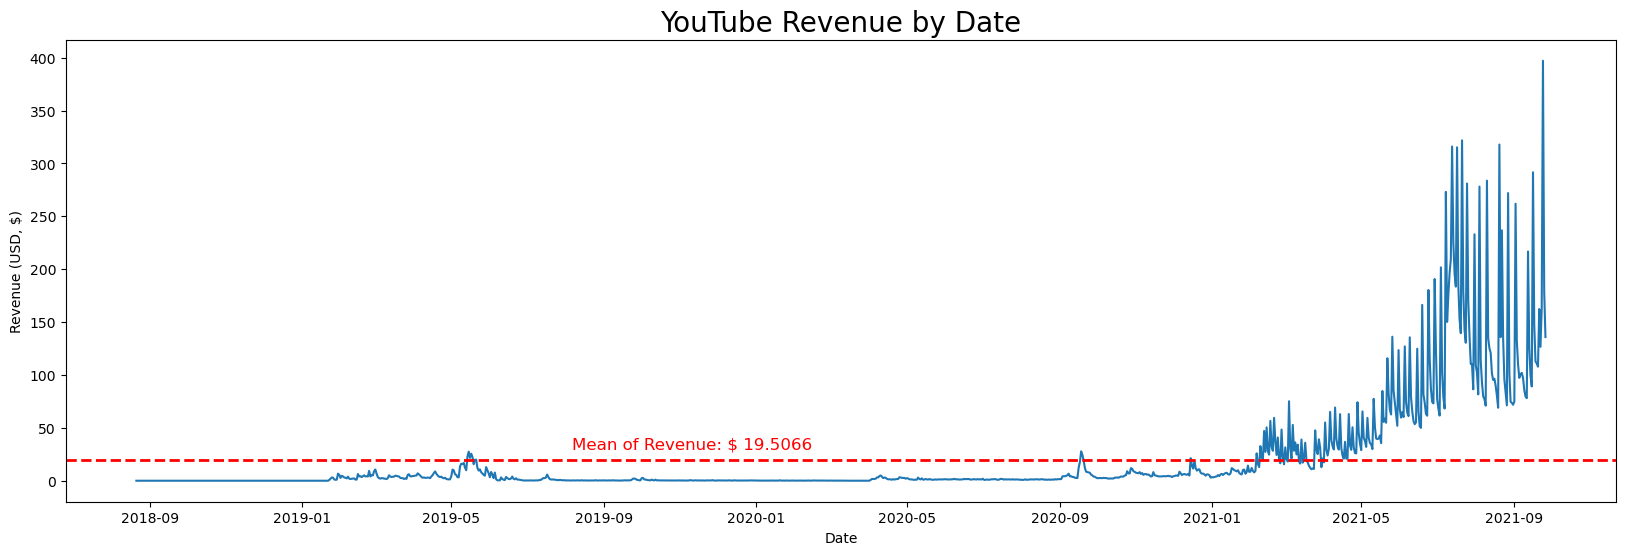

In [23]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x='Date', y='Revenue')
plt.axhline(df.Revenue.mean(), color='r', linestyle='--', linewidth=2)
plt.annotate('Mean of Revenue: $ {}'.format(round(df.Revenue.mean(),4)), 
             (df.Date[350], 30), 
             fontsize=12, 
             color='r')
plt.title('YouTube Revenue by Date', fontsize=20)
plt.ylabel('Revenue (USD, $)')
plt.show()

In [29]:
df.corr()['Revenue'].sort_values(ascending=False).reset_index()[1:]

,index,Revenue
1,Watch_hours,0.984516
2,Unique_viewers,0.978715
3,Views,0.976549
4,Likes,0.964732
5,Dislikes,0.963716
6,Impressions,0.941691
7,Subscribers_lost,0.934129
8,Subscribers_gained,0.923737
9,Subscribers,0.907318
10,Comments,0.830642


NameError: name 'barplot' is not defined

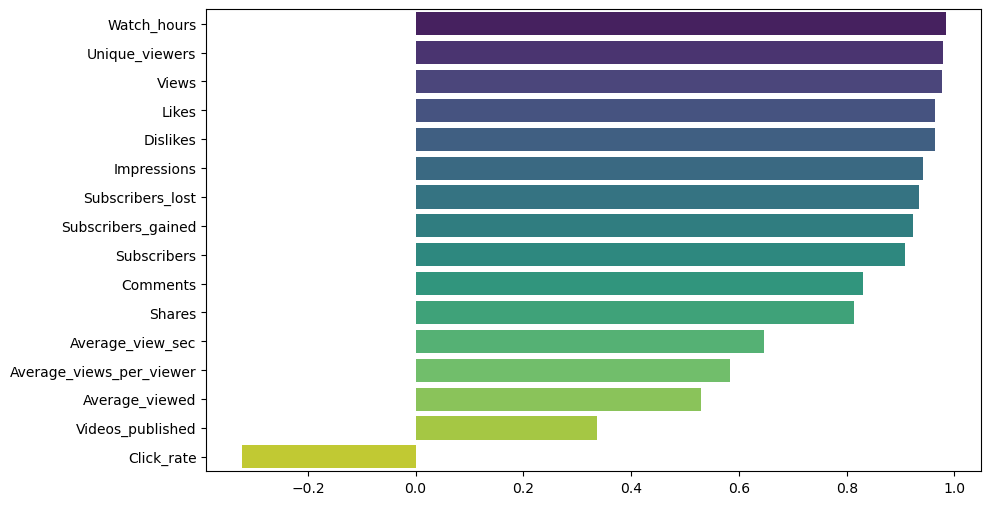

In [36]:
corr_sorted = df.corr()['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_sorted.values[1:], y=corr_sorted.index[1:], palette='viridis', orient='horizontal')
for i,v in enumerate(corr_sorted.values[1:]):
    barplot.test(v+0.02,i,f'{v:.2f}',va='center',color='black',fontsize=9)
plt.xlabel('Correlation with Revenue')
plt.ylabel('Features')
plt.title('Correlation of Features with Revenue')
plt.tight_layout()
plt.show()

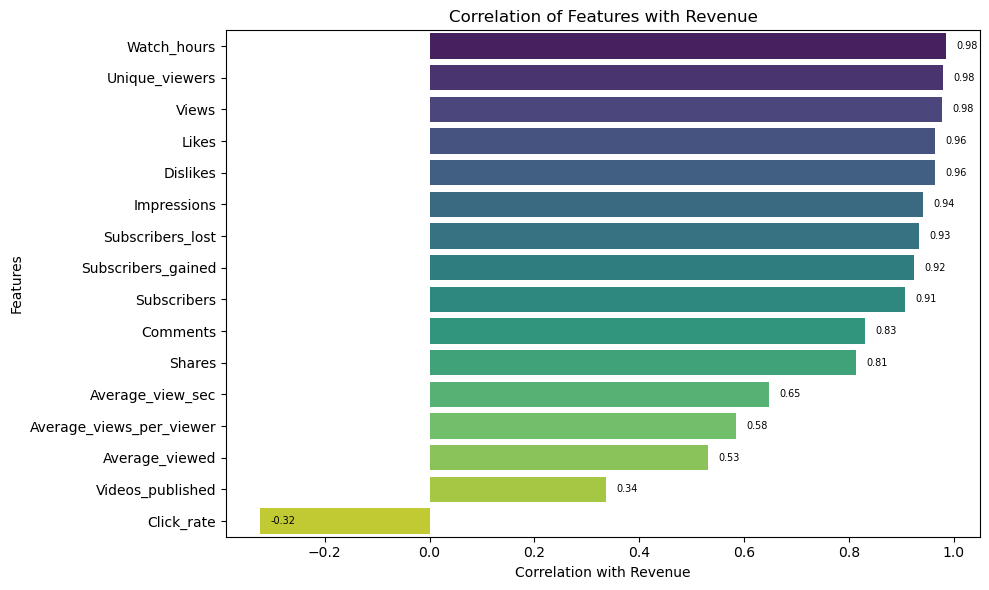

In [38]:
corr_sorted = df.corr()['Revenue'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=corr_sorted.values[1:], y=corr_sorted.index[1:], palette='viridis', orient='horizontal')
plt.xlabel('Correlation with Revenue')
plt.ylabel('Features')
plt.title('Correlation of Features with Revenue')
plt.tight_layout()

for i, v in enumerate(corr_sorted.values[1:]):
    barplot.text(v + 0.02, i, f'{v:.2f}', va='center', color='black', fontsize=7)

plt.show()

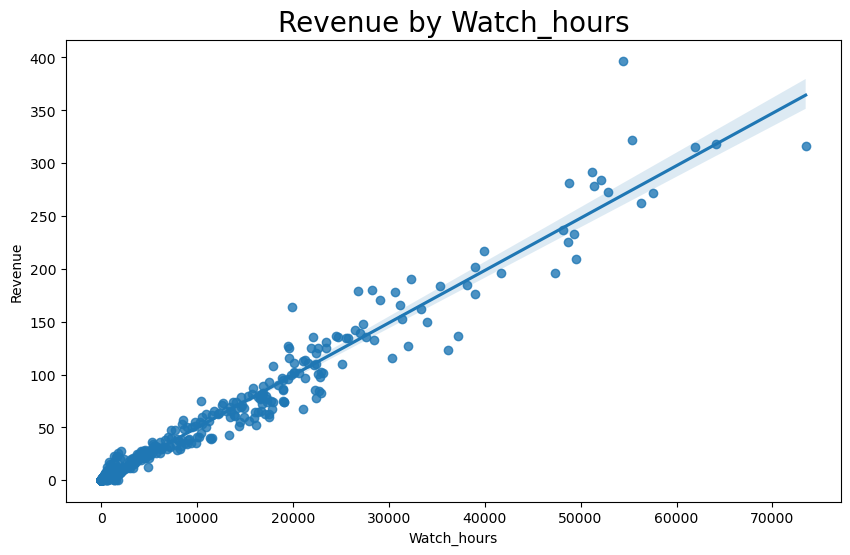

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Watch_hours', y='Revenue')
plt.title('Revenue by Watch_hours', fontsize=20)
plt.show()